# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Statistical overview

In [6]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

Renaming the columns for clarity

In [7]:
column_rename_mapping = {
    'blue': 'Bluetooth Support',
    'dual_sim': 'Dual SIM Support',
    'clock_speed': 'Clock Speed',
    'fc': 'Front Camera',
    'four_g': '4G Support',
    'int_memory': 'Internal Memory (GB)',
    'battery_power': 'Battery Power (mAh)',
    'm_dep': 'Mobile Depth (cm)',
    'mobile_wt': 'Mobile Weight (g)',
    'n_cores': 'Number of Processor Cores',
    'pc': 'Primary Camera (MP)',
    'px_height': 'Pixel Height',
    'px_width': 'Pixel Width',
    'ram': 'RAM (MB)',
    'sc_h': 'Screen Height (cm)',
    'sc_w': 'Screen Width (cm)',
    'talk_time': 'Talk Time (hrs)',
    'three_g': '3G Support',
    'touch_screen': 'Touch Screen Support',
    'wifi': 'WiFi Support',
    'price_range': 'Price Range'
}

df.rename(columns = column_rename_mapping, inplace = True)


# Exploratory data analysis

## Target variable analysis

In [8]:
df["Price Range"].value_counts()

Price Range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

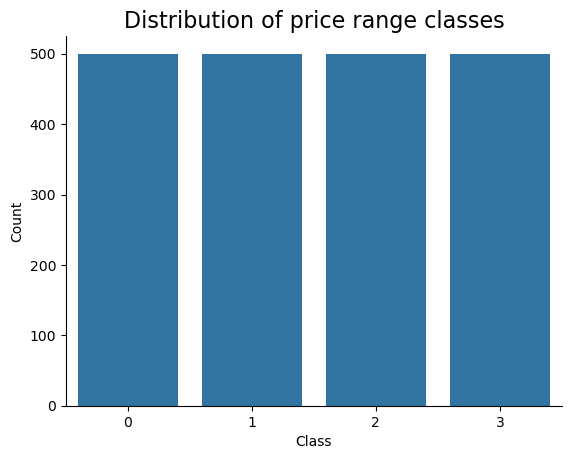

In [9]:
sns.countplot(
    x = "Price Range",
    data = df
)

plt.title("Distribution of price range classes", fontsize = 16)
plt.xlabel("Class")
plt.ylabel("Count")
sns.despine()

## Univariate analysis

### Numerical features

In [10]:
boolfeatures = ['Bluetooth Support', 'Dual SIM Support', '4G Support', '3G Support', 'Touch Screen Support', 'WiFi Support', 'Price Range']

numerical_df = df.drop(columns = boolfeatures)
boolean_df = df.loc[:, boolfeatures]

#### Distribution

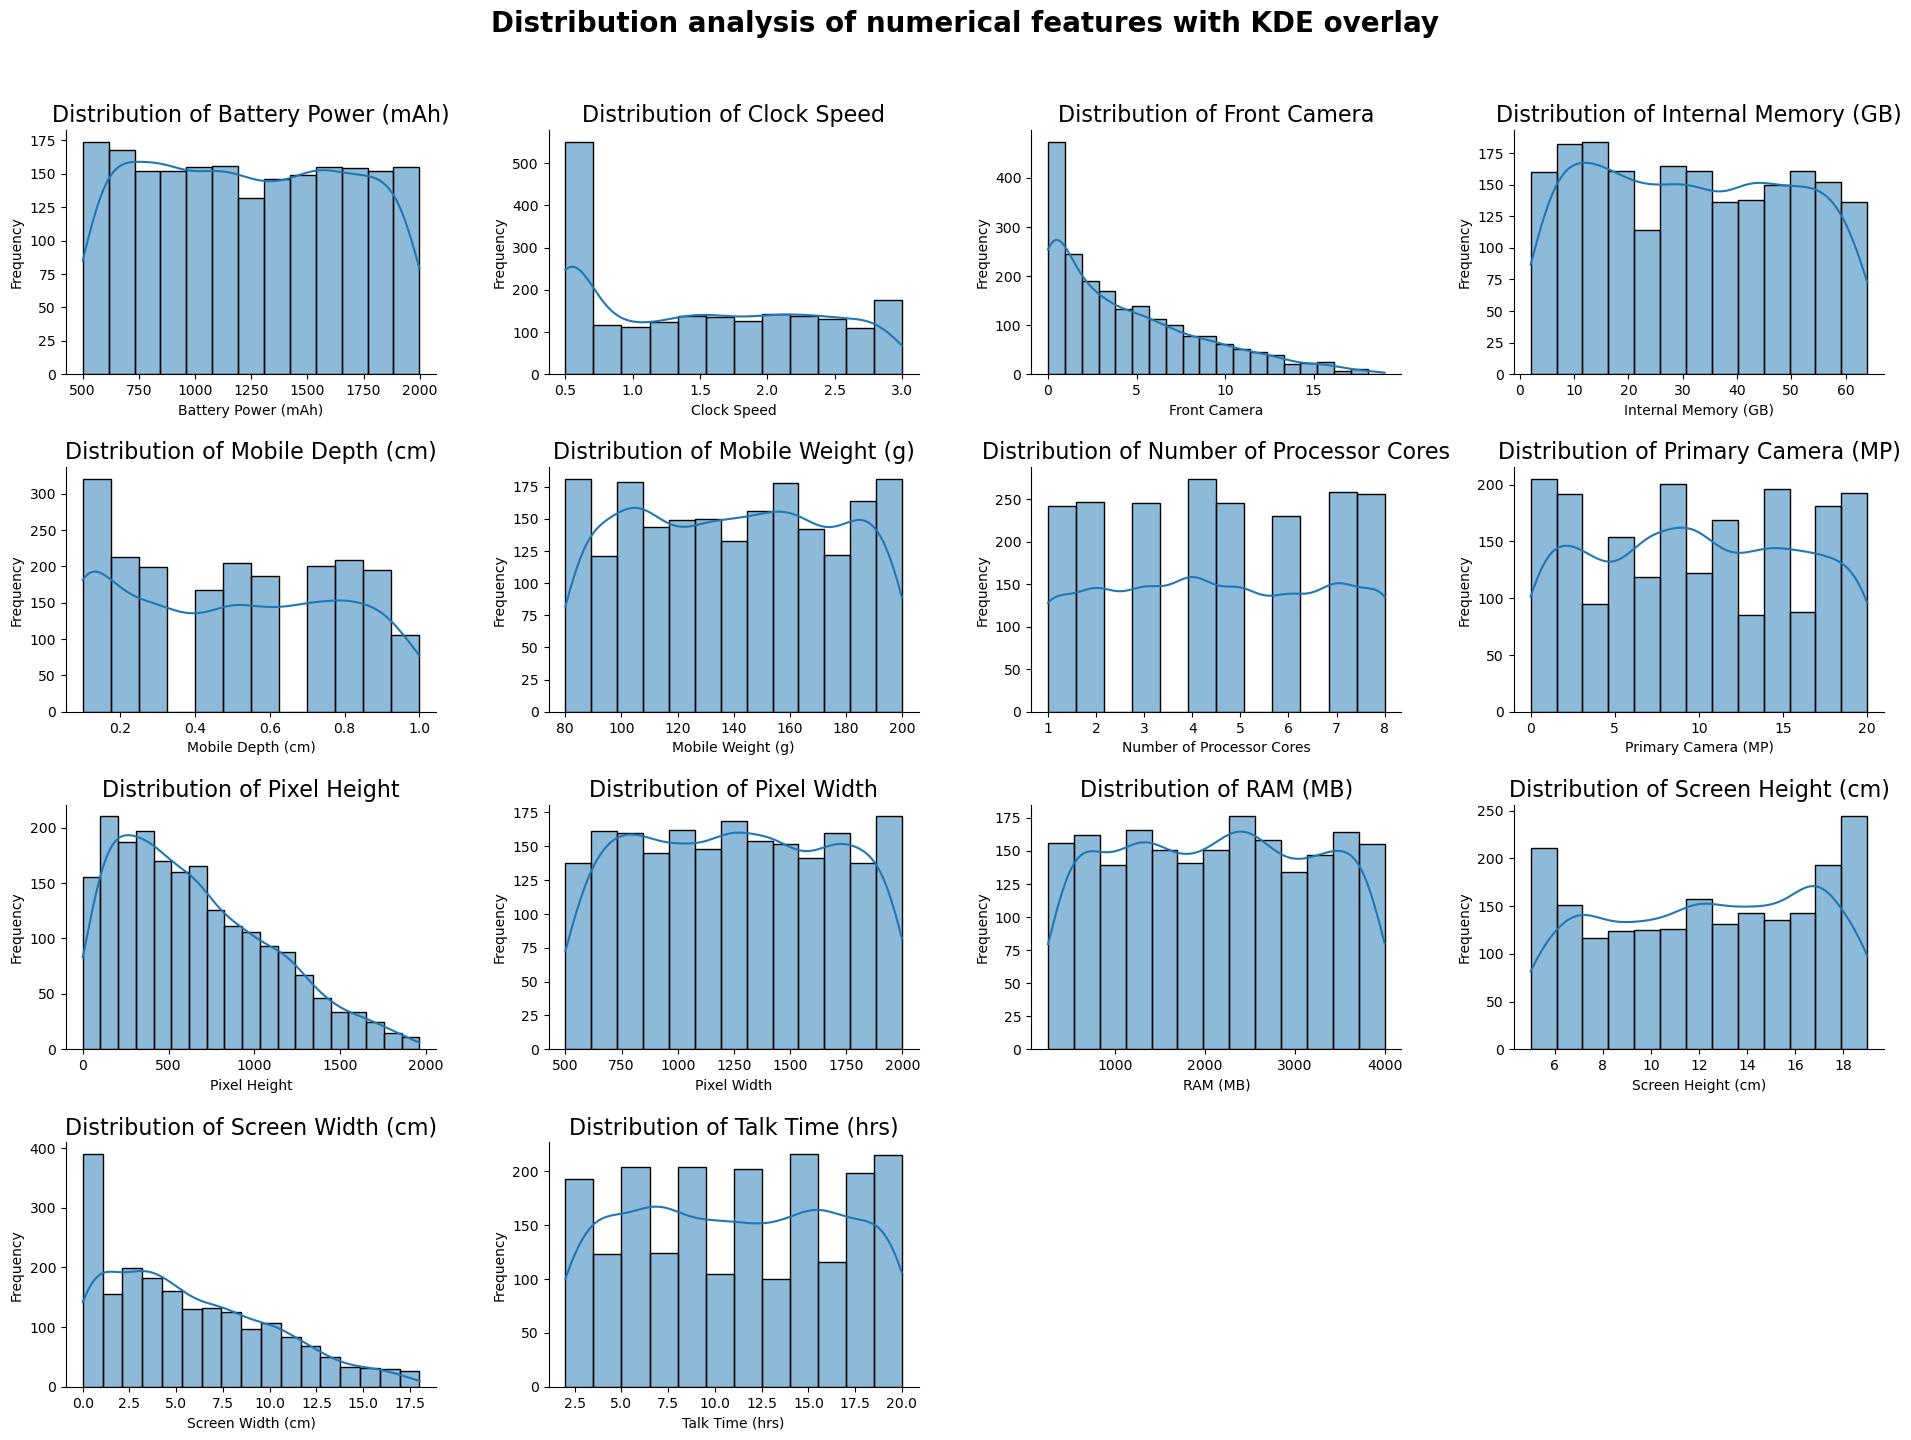

In [11]:
num_features = numerical_df.columns

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
fig.tight_layout(pad = 5.0) 
fig.subplots_adjust(top = 0.9)  

axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(numerical_df[feature], kde = True, ax = axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize = 16)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle("Distribution analysis of numerical features with KDE overlay", fontsize = 20, fontweight = 'bold')

plt.show()

#### Outliers detection

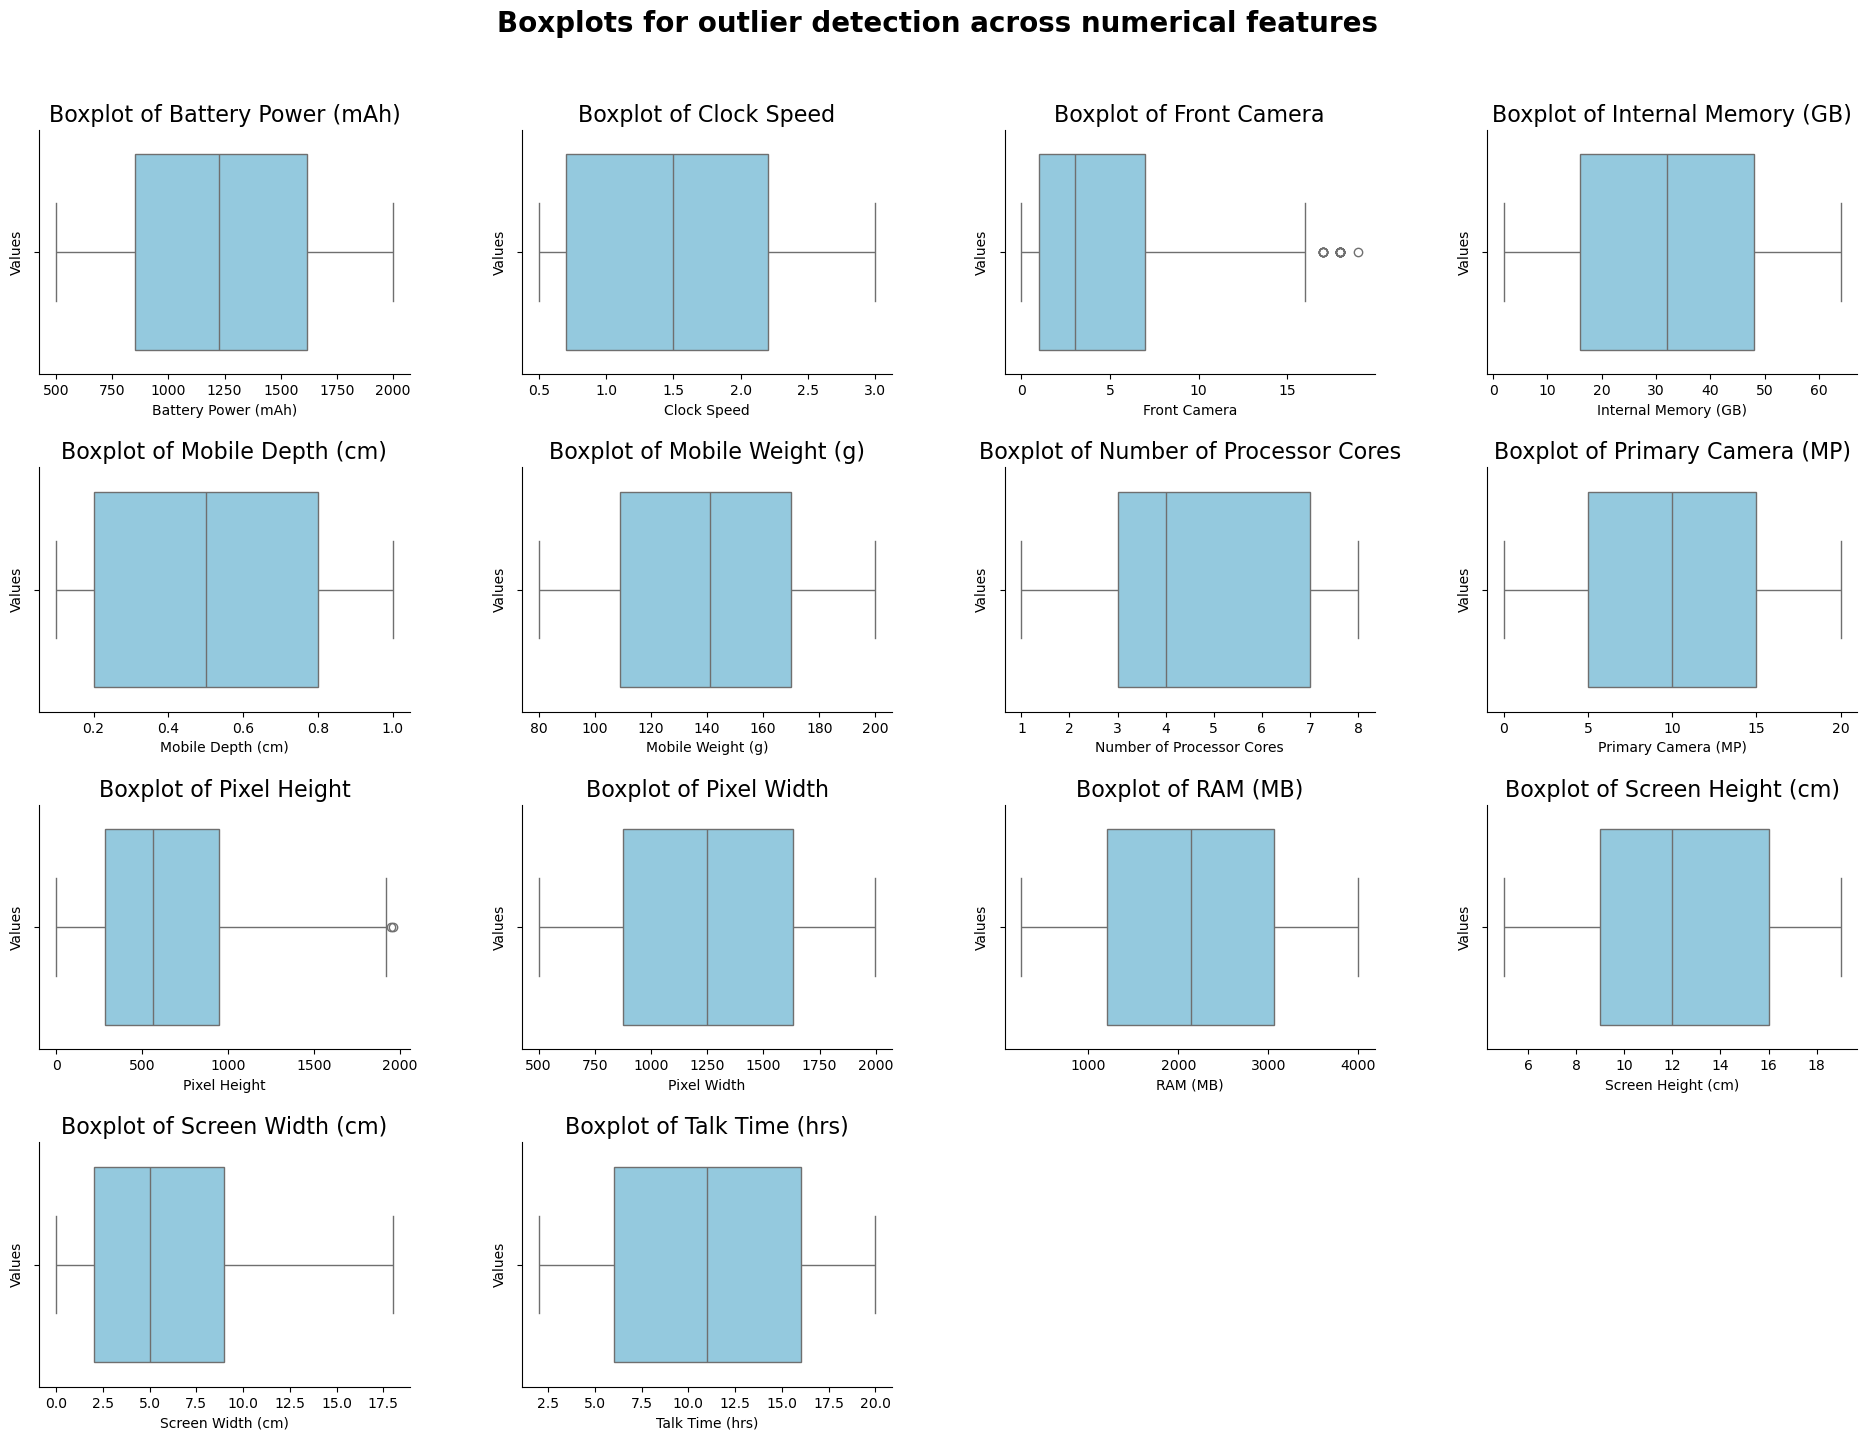

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
fig.tight_layout(pad = 5.0)  
fig.subplots_adjust(top = 0.9) 

axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x = numerical_df[feature], ax = axes[i], color = 'skyblue')
    axes[i].set_title(f'Boxplot of {feature}', fontsize = 16)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots for outlier detection across numerical features", fontsize = 20, fontweight = 'bold')

plt.show()

### Boolean features

In [13]:
boolean_df.drop("Price Range", axis = 1, inplace = True)

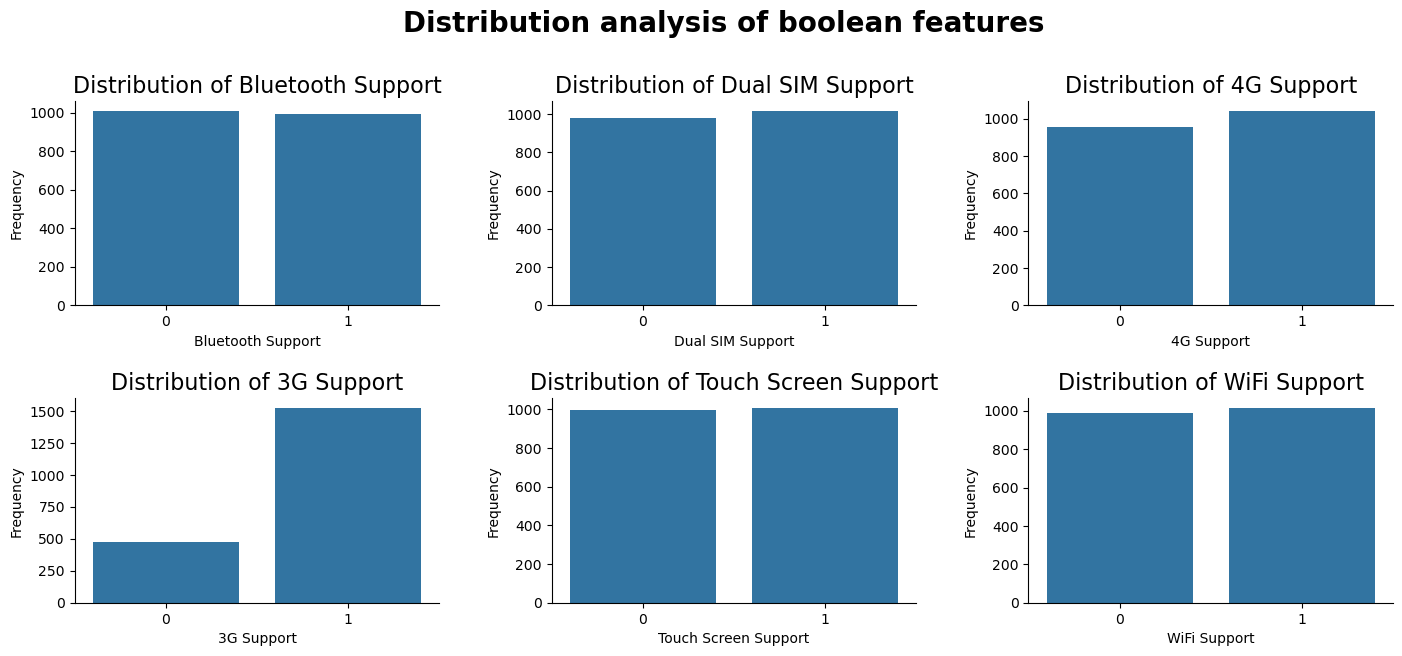

In [14]:
bool_features = boolean_df.columns

fig, axes = plt.subplots(2, 3, figsize = (15, 7))
fig.tight_layout(pad = 5.0) 
fig.subplots_adjust(top = 0.85)  

axes = axes.flatten()

for i, feature in enumerate(bool_features):
    sns.countplot(x = feature, data = df, ax = axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize = 16)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

for j in range(len(bool_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribution analysis of boolean features", fontsize = 20, fontweight = 'bold')

plt.show()


## Bivariate analysis

### Target vs Numerical features

In [15]:
Price_range_mean = df.pivot_table(
    index = "Price Range",
    values = num_features,
    aggfunc = "mean"
)

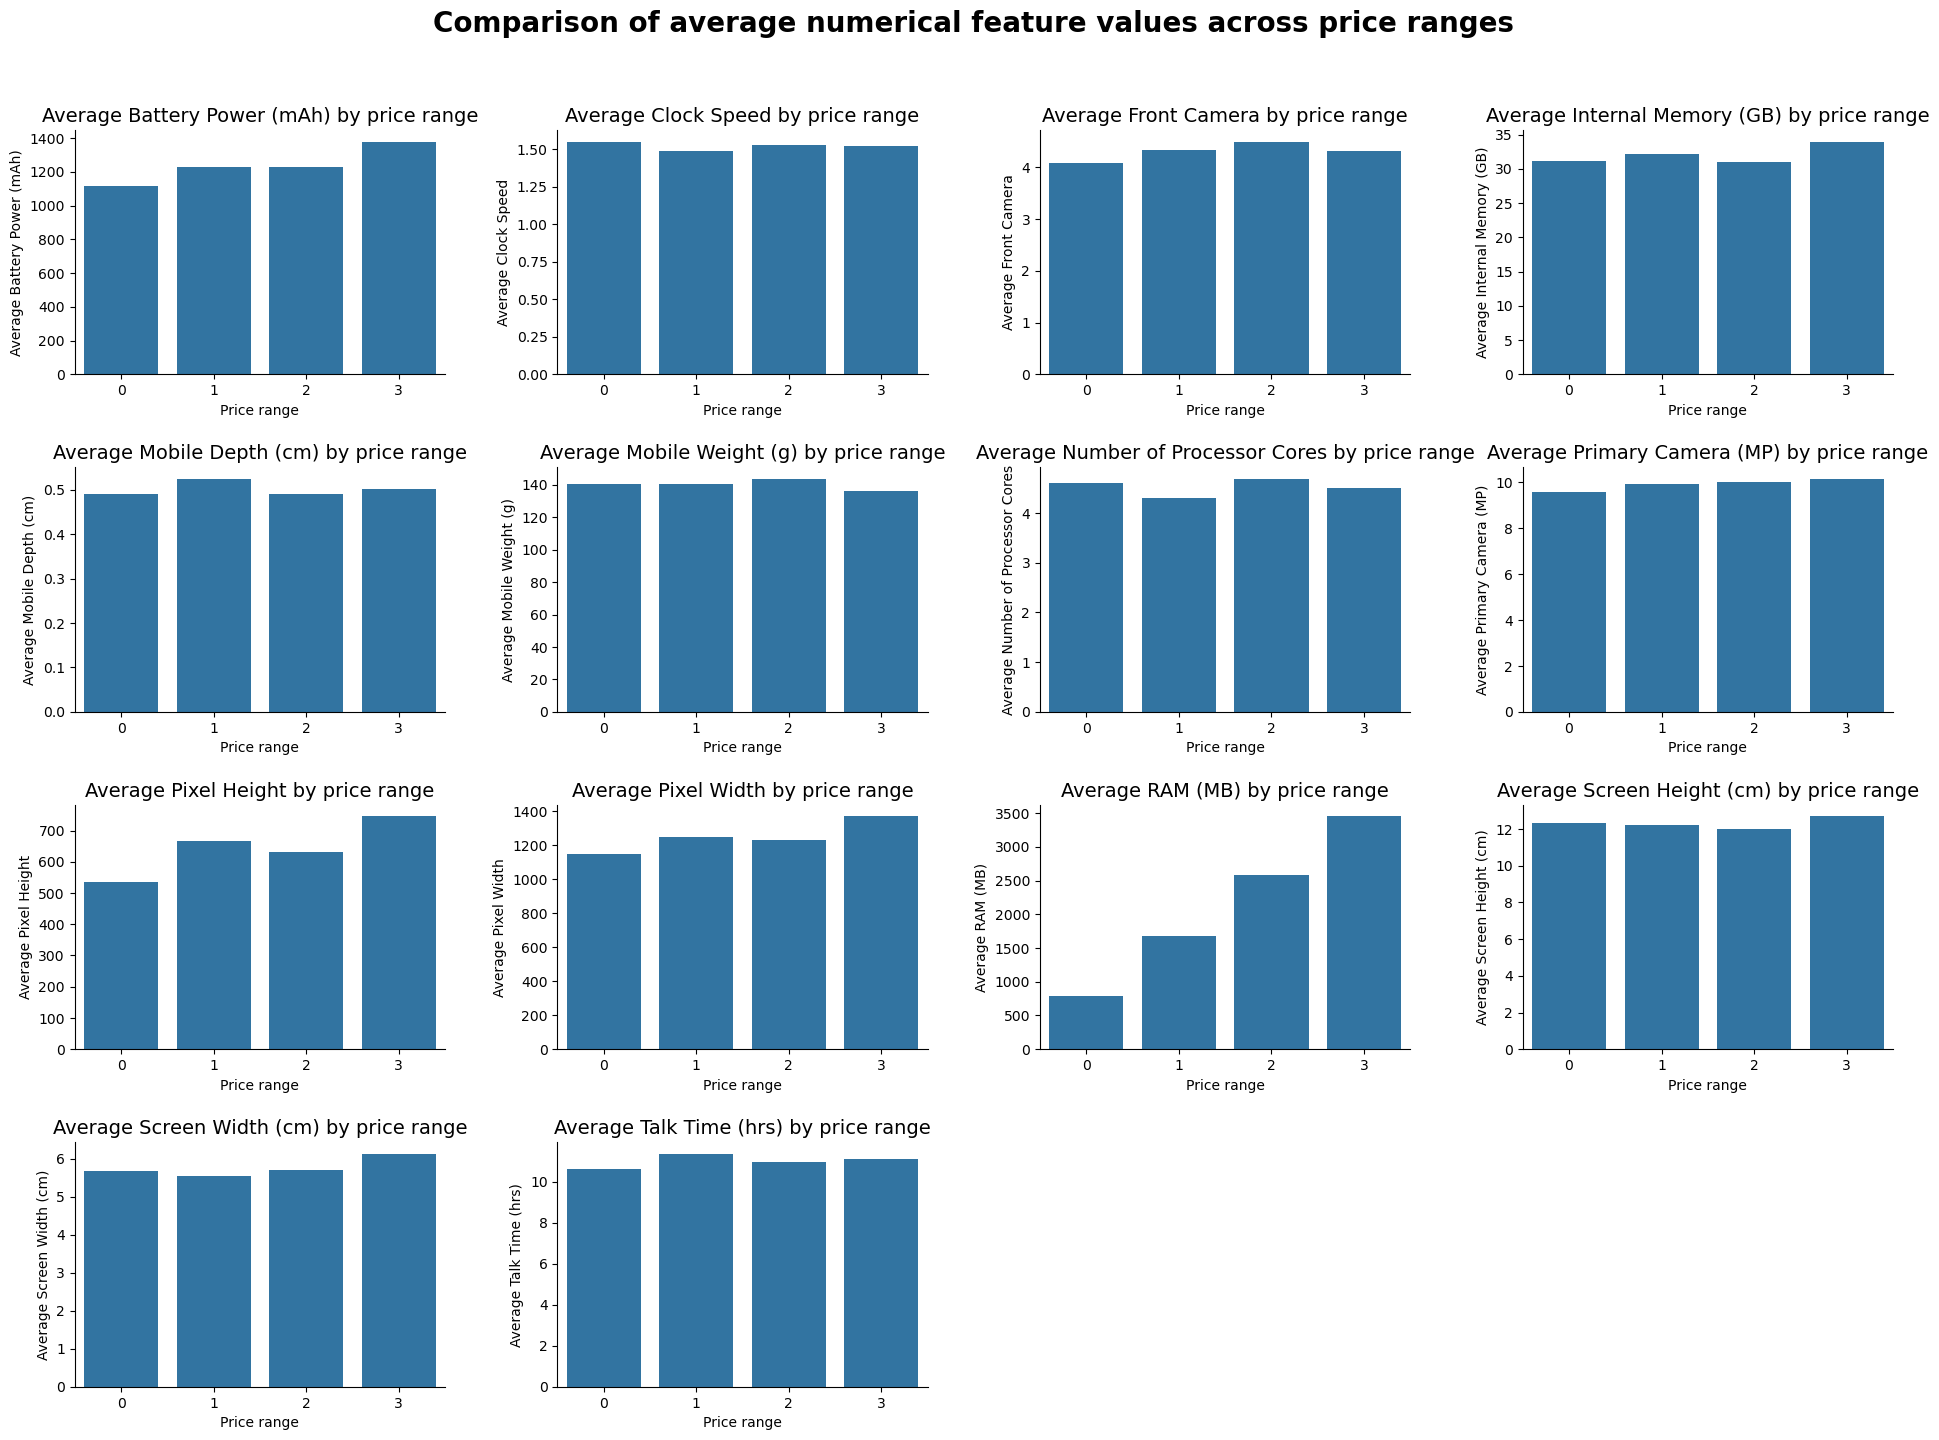

In [16]:
fig, axes = plt.subplots(4, 4, figsize = (20, 15))
fig.tight_layout(pad = 5.0)
fig.subplots_adjust(top = 0.9)

axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.barplot(
        x = Price_range_mean.index,
        y = Price_range_mean.loc[:, feature],
        ax = axes[i]
    )
    axes[i].set_title(f'Average {feature} by price range', fontsize = 14)
    axes[i].set_xlabel('Price range')
    axes[i].set_ylabel(f'Average {feature}')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Comparison of average numerical feature values across price ranges",
    fontsize = 20,
    fontweight='bold'
)

plt.show()

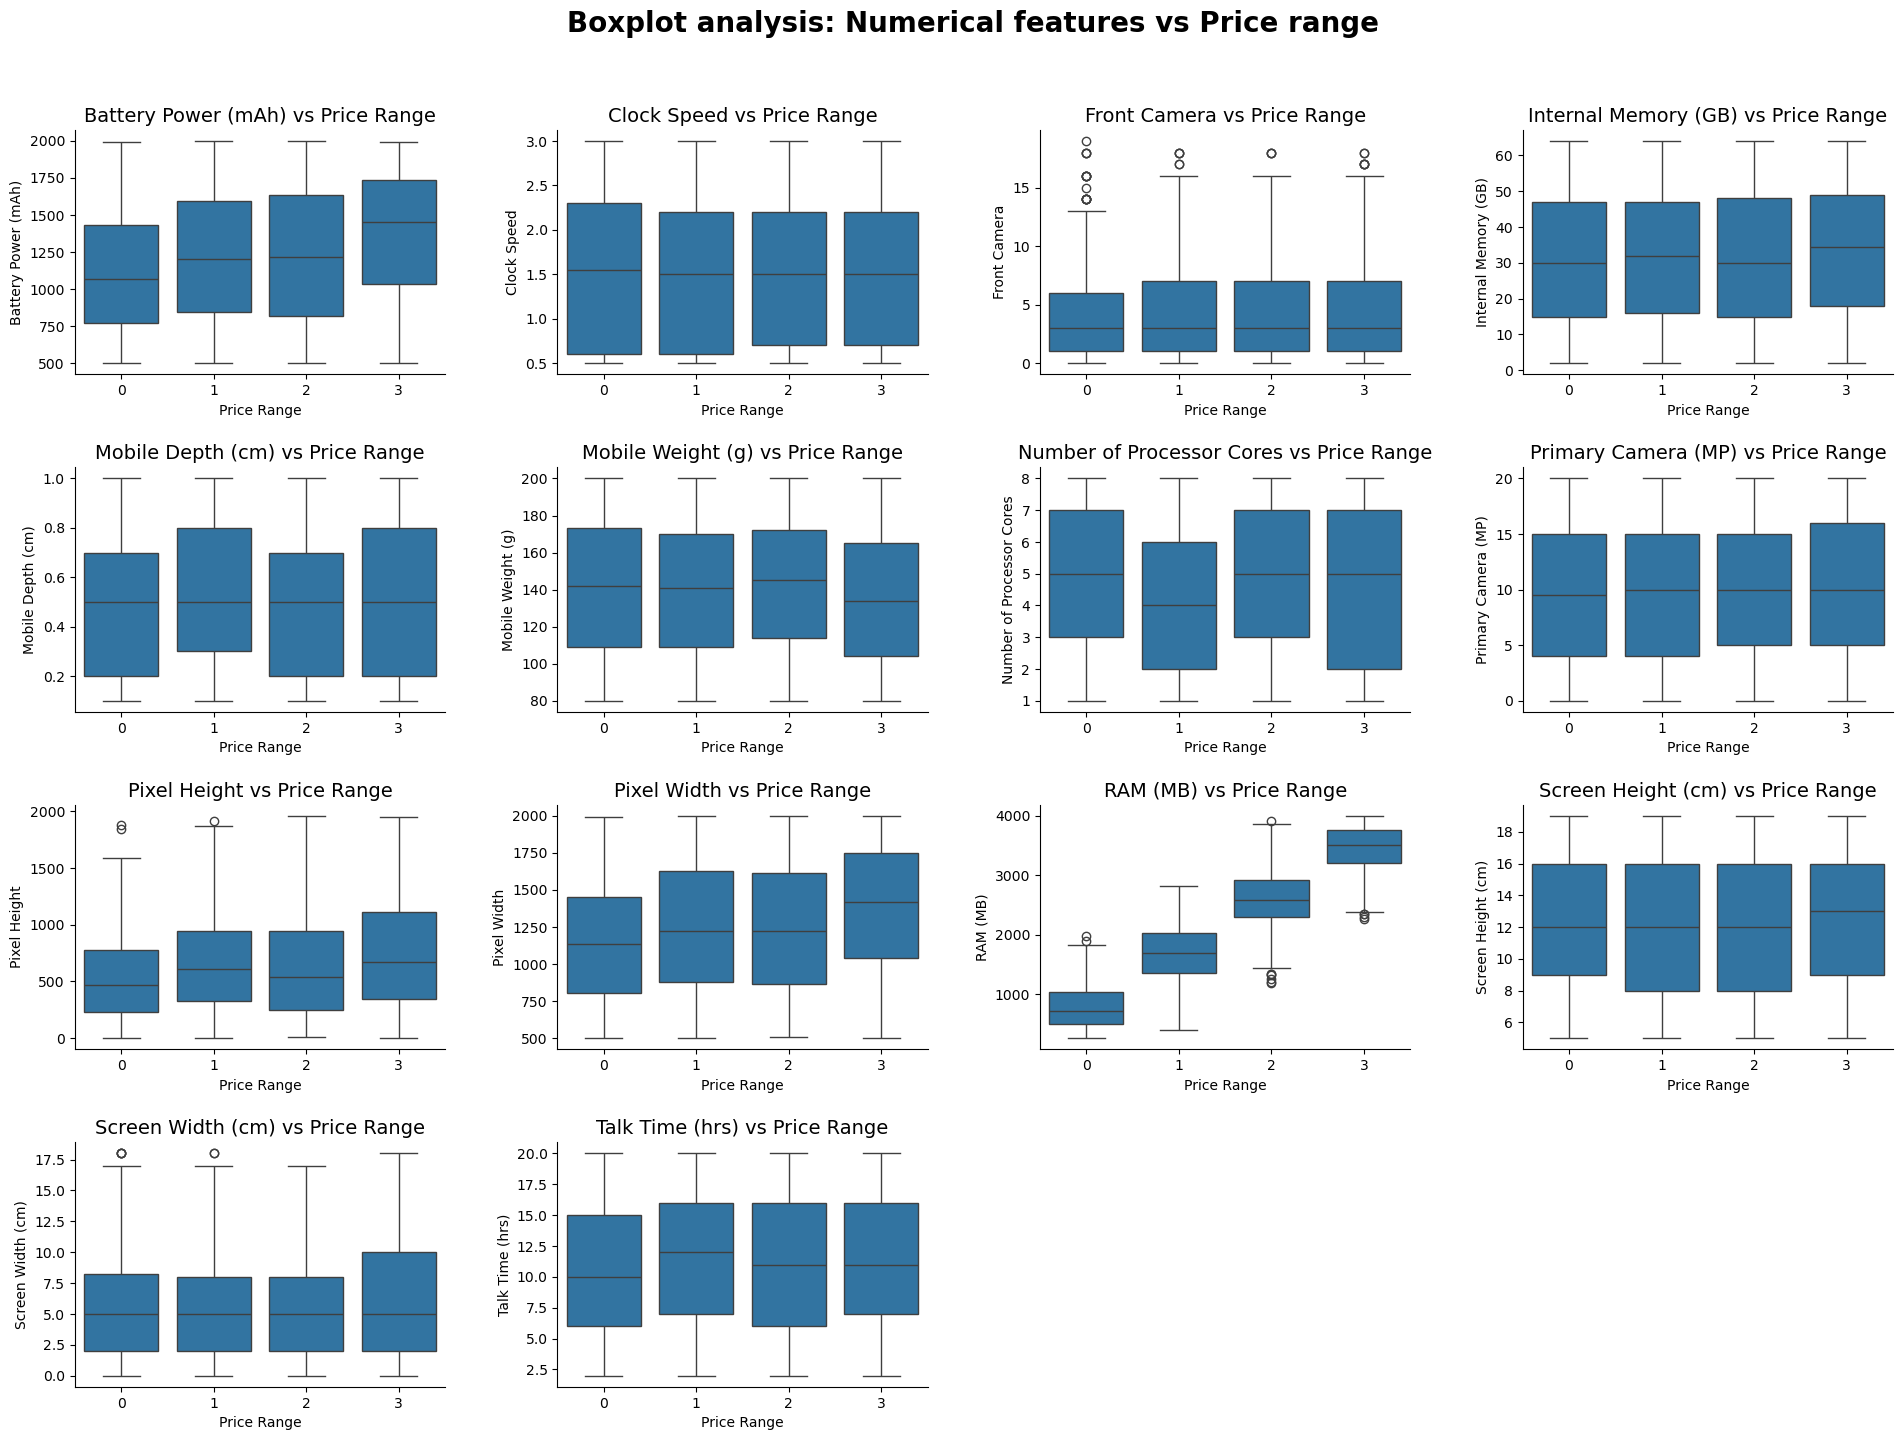

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.9)

axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(
        data = df, 
        x = 'Price Range', 
        y = feature, 
        ax = axes[i]
    )
    axes[i].set_title(f'{feature} vs Price Range', fontsize = 14)
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Boxplot analysis: Numerical features vs Price range",
    fontsize = 20,
    fontweight = 'bold'
)

plt.show()

### Target vs Boolean features

In [18]:
Price_range_bool = df.pivot_table(
    index = "Price Range",
    values = bool_features,
    aggfunc = "count"
)

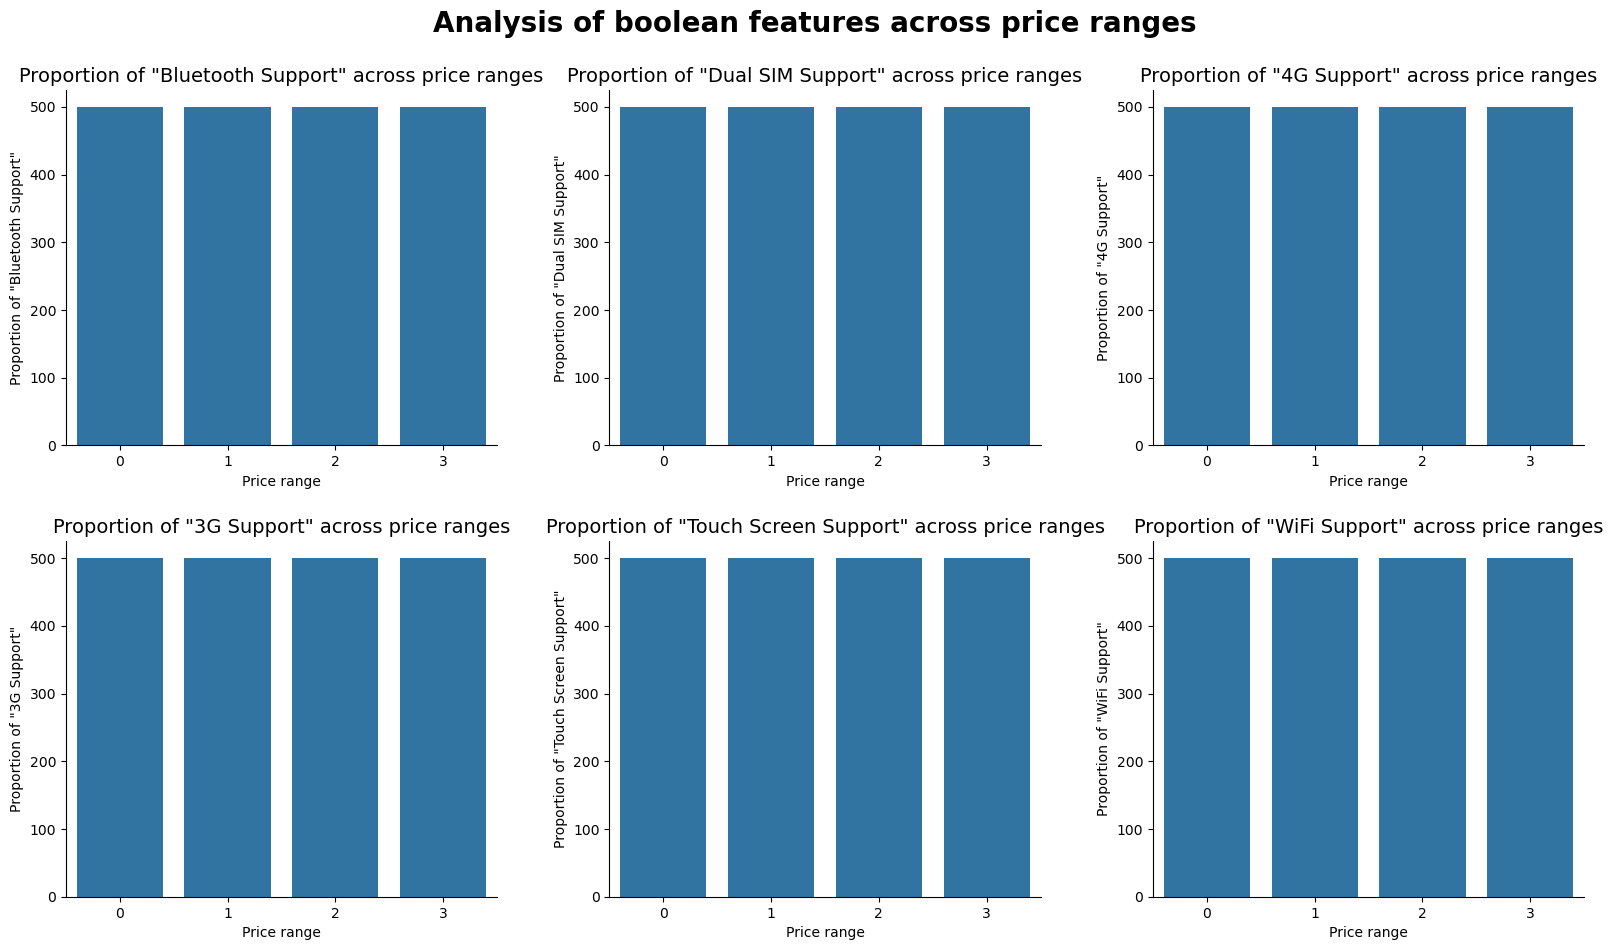

In [19]:
fig, axes = plt.subplots(2, 3, figsize = (17, 10))
fig.tight_layout(pad = 5.0)
fig.subplots_adjust(top = 0.9)

axes = axes.flatten()

for i, feature in enumerate(bool_features):
    sns.barplot(
        x = Price_range_bool.index,
        y = Price_range_bool.loc[:, feature],
        ax = axes[i],
    )
    axes[i].set_title(f'Proportion of "{feature}" across price ranges', fontsize = 14)
    axes[i].set_xlabel('Price range')
    axes[i].set_ylabel(f'Proportion of "{feature}"')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

for j in range(len(bool_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Analysis of boolean features across price ranges",
    fontsize=  20,
    fontweight = 'bold'
)

plt.show()

## Correlation analysis

C:\Users\muham\AppData\Local\Temp\ipykernel_8864\2721612275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


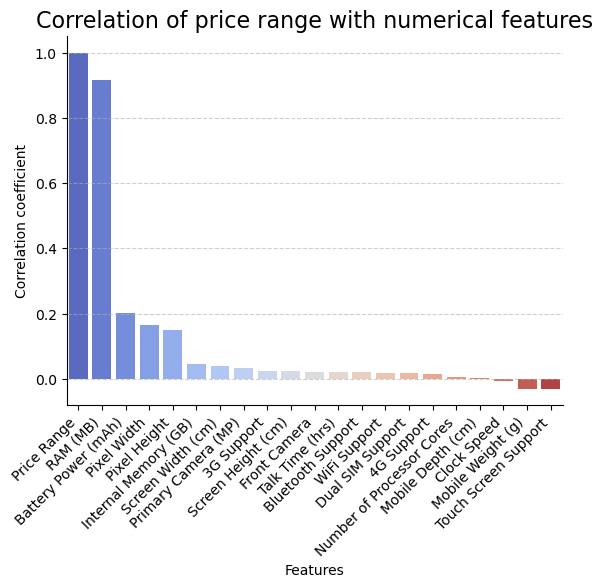

In [20]:
correlation_matrix = df.corr()

price_range_corr = correlation_matrix['Price Range'].sort_values(ascending = False)

sns.barplot(
    x = price_range_corr.index,
    y = price_range_corr.values, 
    palette = 'coolwarm'
)
sns.despine()
plt.title('Correlation of price range with numerical features', fontsize = 16)
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()


## Multivariate analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


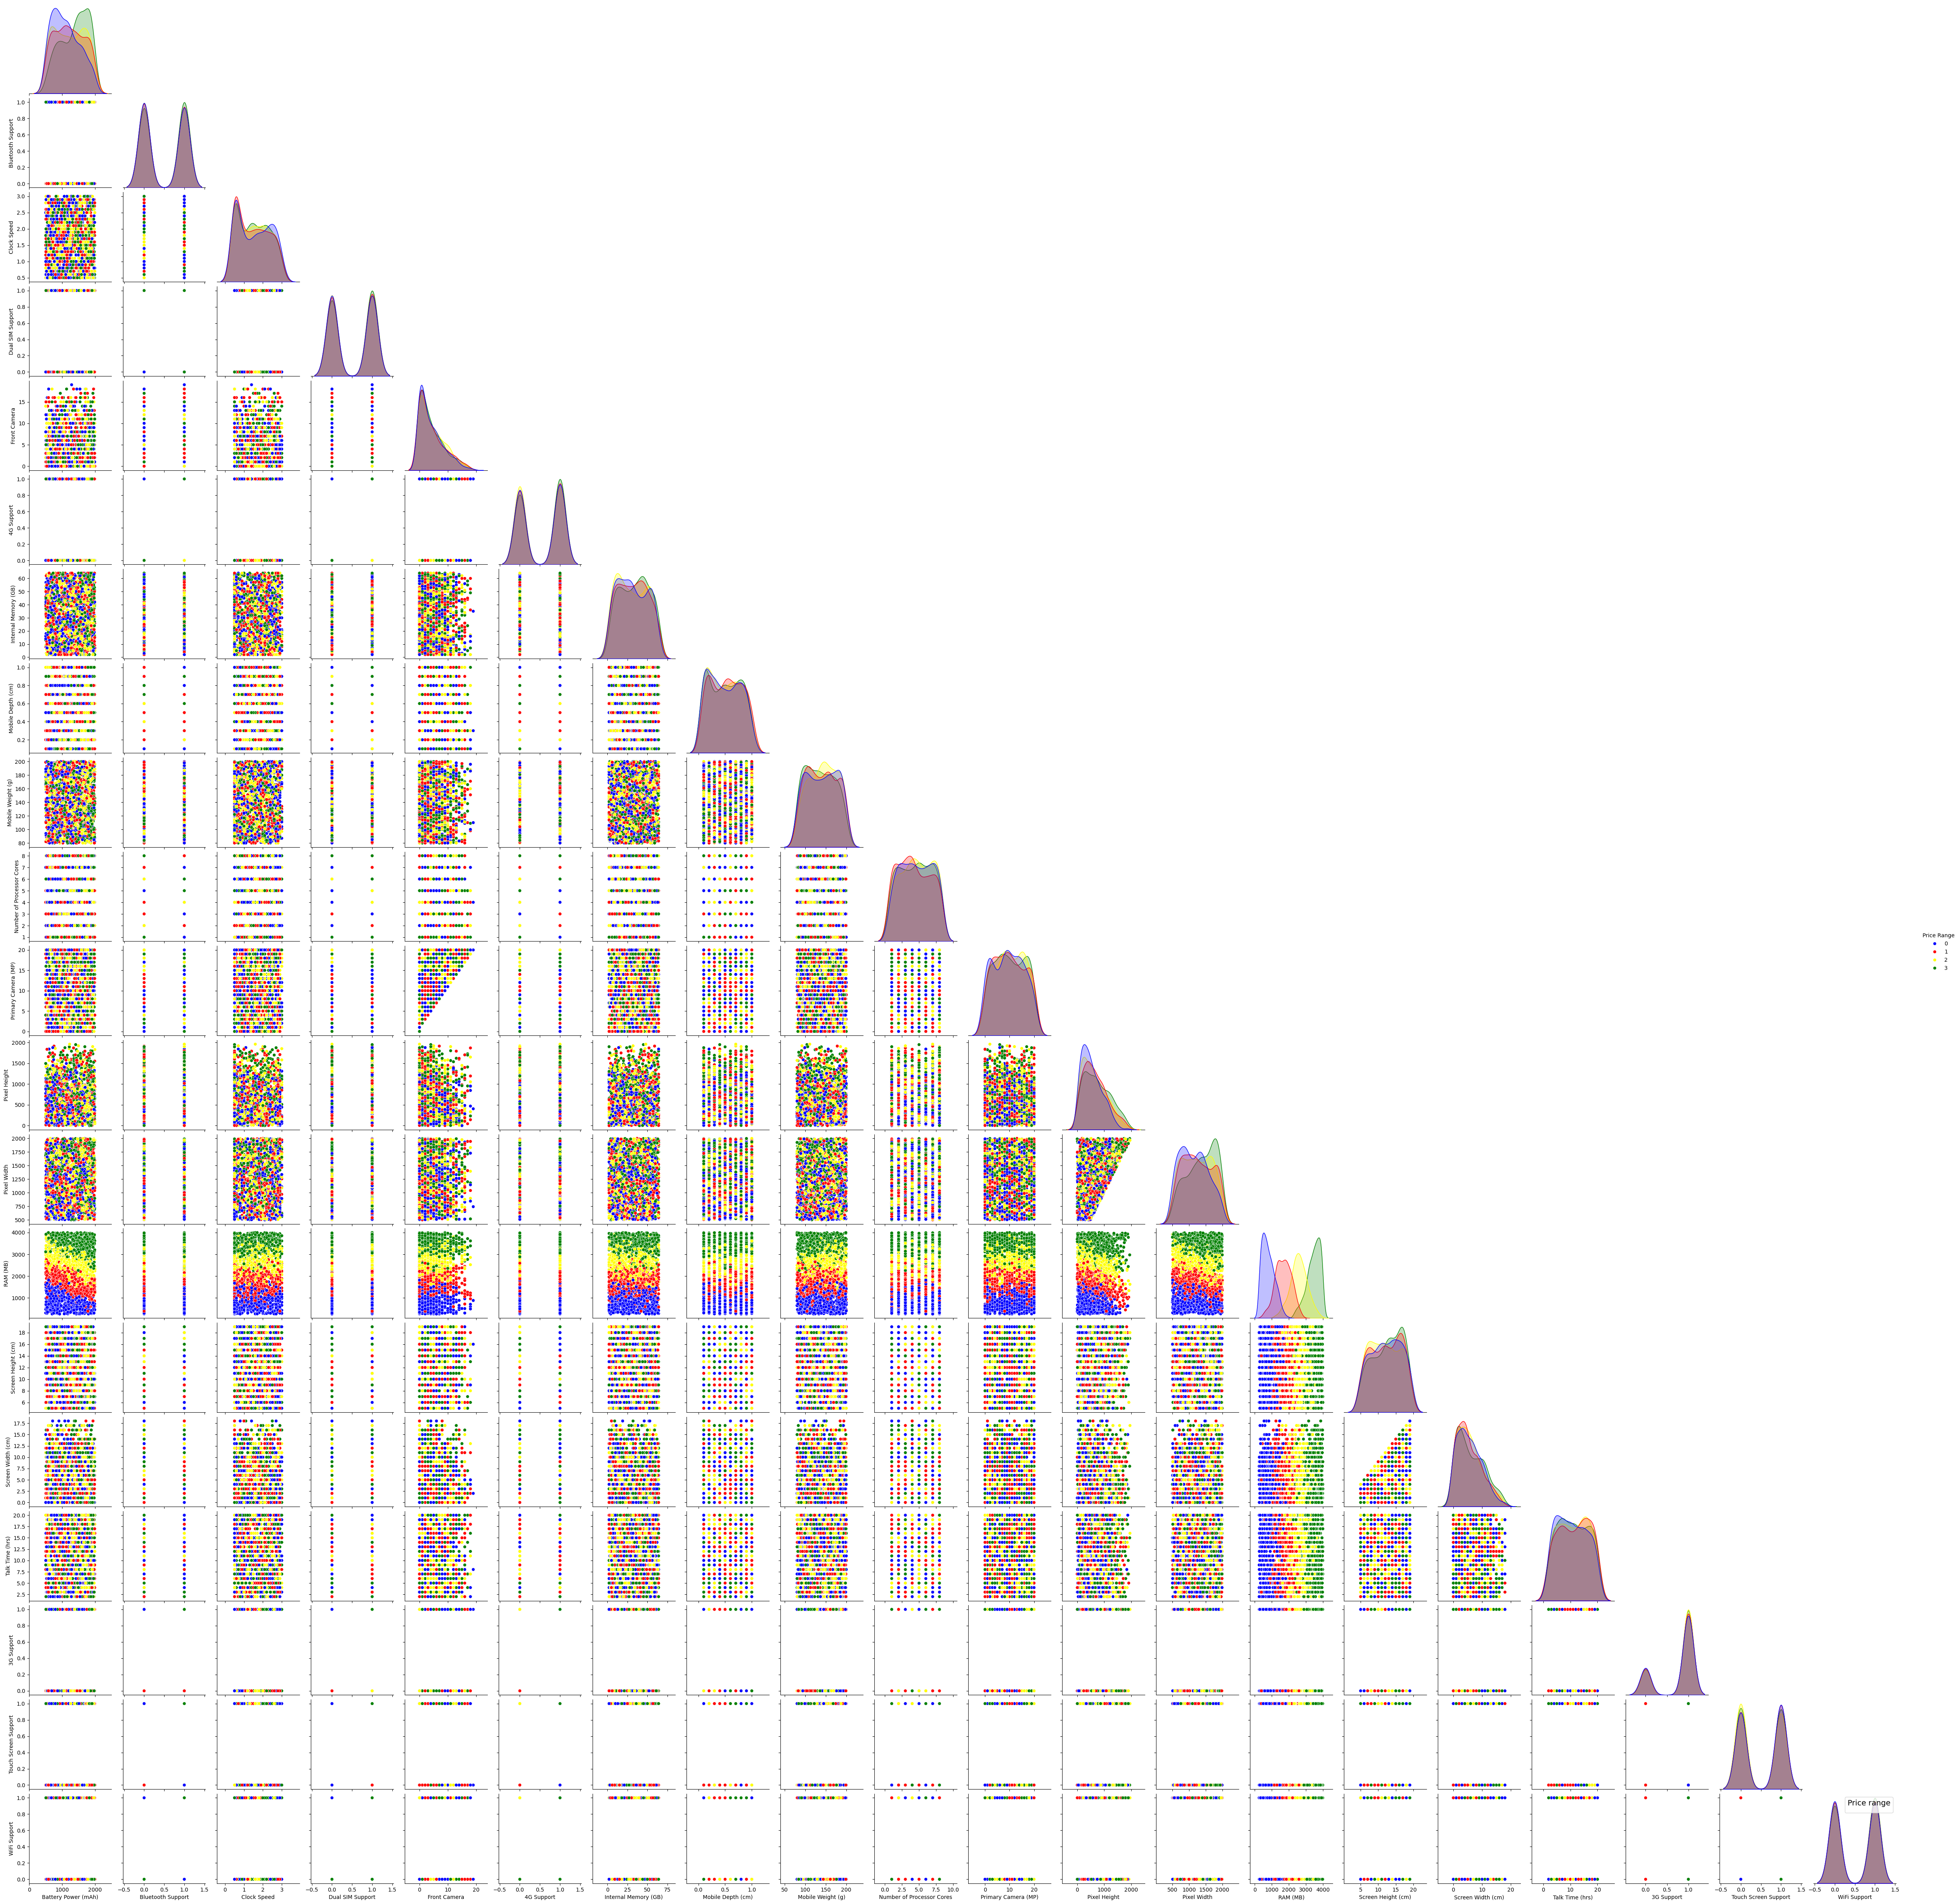

In [21]:
custom_palette = {
    0: "blue",
    1: "red",
    2: "yellow",
    3: "green"
}

sns.pairplot(df, hue = "Price Range", corner = True, palette = custom_palette)

plt.legend(title = "Price range", fontsize = 12, title_fontsize = 14, loc = 'upper right', markerscale = 1.5)
plt.show()


# Modeling

In [22]:
df_model = df.copy()

## Feature engineering

In [24]:
df_model = df_model.assign(
    Pixels = df_model["Pixel Height"] * df_model["Pixel Width"],
    Diagonal = (df_model["Screen Height (cm)"] ** 2 + df_model["Screen Width (cm)"] ** 2) ** 0.5,
)


## Classification

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [26]:
X = df_model.drop(columns = ['Price Range', 'Pixel Height', 'Pixel Width', 'Screen Height (cm)', 'Screen Width (cm)'])
y = df_model['Price Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

### Logistic regression

In [28]:
# Scaling the features (StandardScaler for Logistic Regression and Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Logistic Regression
log_reg = LogisticRegression(random_state = 42, multi_class='ovr', solver='lbfgs')
log_reg_scores = cross_validate(log_reg, X_scaled, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nLogistic Regression scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {log_reg_scores['test_' + metric].mean():.4f}")


Logistic Regression scores:
Accuracy: 0.8262
Precision_weighted: 0.8209
Recall_weighted: 0.8262
F1_weighted: 0.8214


### Random forest

In [29]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 42)
rf_scores = cross_validate(random_forest, X_train, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nRandom Forest scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {rf_scores['test_' + metric].mean():.4f}")


Random Forest scores:
Accuracy: 0.8662
Precision_weighted: 0.8674
Recall_weighted: 0.8662
F1_weighted: 0.8660


### KNN

In [30]:
# Normalization (MinMaxScaler for KNN)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_train)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_scores = cross_validate(knn, X_normalized, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nKNN scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {knn_scores['test_' + metric].mean():.4f}")


KNN scores:
Accuracy: 0.3969
Precision_weighted: 0.4130
Recall_weighted: 0.3969
F1_weighted: 0.3952


### Naive bayes 

In [31]:
# Naive Bayes Classifier (GaussianNB)
naive_bayes = GaussianNB()
nb_scores = cross_validate(naive_bayes, X_scaled, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nNaive Bayes scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {nb_scores['test_' + metric].mean():.4f}")



Naive Bayes scores:
Accuracy: 0.8006
Precision_weighted: 0.8043
Recall_weighted: 0.8006
F1_weighted: 0.8013


### Validating the random forest model

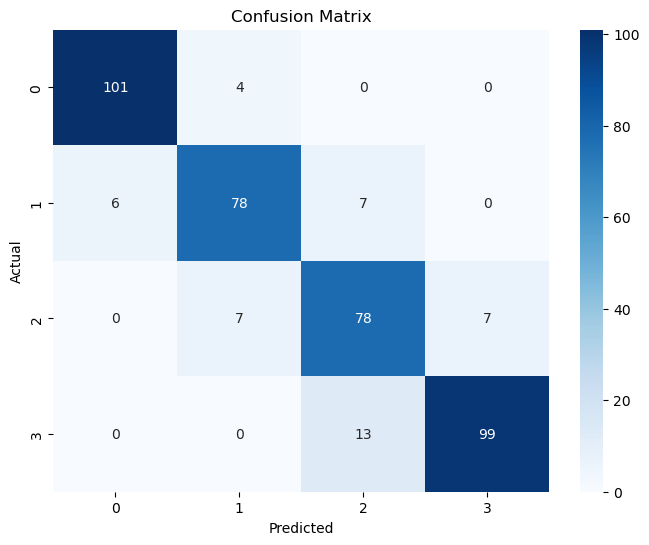


Final Random Forest Model Evaluation (on test set):
Accuracy: 0.8900
Precision (weighted): 0.8917
Recall (weighted): 0.8900
F1 Score (weighted): 0.8904


In [32]:
# Fit the Random Forest model on the training data
random_forest.fit(X_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = random_forest.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the results
print("\nFinal Random Forest Model Evaluation (on test set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")


## Predicting the test set

In [33]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test.rename(columns = column_rename_mapping, inplace = True)

In [35]:
df_test.drop("id", axis = 1, inplace = True)

In [36]:
df_test = df_test.assign(
    Pixels = df_test["Pixel Height"] * df_test["Pixel Width"],
    Diagonal = (df_test["Screen Height (cm)"] ** 2 + df_test["Screen Width (cm)"] ** 2) ** 0.5,
)

X_predict = df_test.drop(columns = ['Pixel Height', 'Pixel Width', 'Screen Height (cm)', 'Screen Width (cm)'])

In [37]:
scaler = StandardScaler()
X_predict_scaled = scaler.fit_transform(X_predict) 

predictions = random_forest.predict(X_predict_scaled)

df_test["Predicted Price Range"] = predictions

df_test.to_excel("predicted_price_ranges.xlsx", index=False)  
print("Predictions saved to 'predicted_price_ranges.xlsx'")


Predictions saved to 'predicted_price_ranges.xlsx'
